Взфть датасет homework.csv  
[ https://www.kaggle.com/c/boston-housing/overview ]

Решить задачу регрессии:  
[ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ]  
[ https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html ]  
[ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html ]  

Оценить качество регрессии при помощи метрик:  
[ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html ]  
[ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html ]  
[ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html ]  

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt



In [5]:
with open("2 - homework.csv") as f:
    print(f.readline())

ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv



In [14]:
df = pd.read_csv("2 - homework.csv")
df.drop('ID', axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [16]:
for col in df.columns:
    print(col, df[col].unique().size)

crim 332
zn 25
indus 68
chas 2
nox 77
rm 308
age 260
dis 295
rad 9
tax 59
ptratio 42
black 237
lstat 310
medv 192


In [23]:
x = df.drop('medv', axis=1)
x_columns = x.columns
y = df.medv
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [76]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pred = lin_reg.predict(x_test)

In [78]:
mse_lin_reg = mean_squared_error(y_test, y_pred)
r2_lin_reg = r2_score(y_test, y_pred)
mae_lin_reg = mean_absolute_error(y_test, y_pred)

In [79]:
lin_reg_metrics = [mse_lin_reg, r2_lin_reg, mae_lin_reg]

In [44]:
print(f'mse = ', mean_squared_error(y_test, y_pred))
print(f'r2 = ', r2_score(y_test, y_pred))
print(f'mae = ', mean_absolute_error(y_test, y_pred))


mse =  20.043563693333827
r2 =  0.7165007559982688
mae =  3.364325422282562


In [80]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [81]:
tree.feature_importances_

array([4.77121398e-02, 9.87231625e-04, 3.32162935e-03, 9.11716533e-07,
       8.13057724e-03, 5.79868192e-01, 1.37725734e-02, 9.20611487e-02,
       5.94244600e-03, 9.52590217e-03, 1.24977169e-02, 1.04348834e-02,
       2.15744648e-01])

In [82]:
x_columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [83]:
y_pred = tree.predict(x_test)
print(f'mse = ', mean_squared_error(y_test, y_pred))
print(f'r2 = ', r2_score(y_test, y_pred))
print(f'mae = ', mean_absolute_error(y_test, y_pred))

mse =  26.906666666666666
r2 =  0.6194279732229684
mae =  3.314285714285713


In [84]:
mse_lin_tree = mean_squared_error(y_test, y_pred)
r2_lin_tree = r2_score(y_test, y_pred)
mae_lin_tree = mean_absolute_error(y_test, y_pred)

In [85]:
tree_metrics = [mse_lin_tree, r2_lin_tree, mae_lin_tree]

In [86]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
forest.feature_importances_

array([0.04300036, 0.00117115, 0.00624374, 0.00116759, 0.00858176,
       0.41124772, 0.01652085, 0.07264207, 0.00504599, 0.01481867,
       0.00865704, 0.01375265, 0.39715039])

In [87]:
y_pred = forest.predict(x_test)
print(f'mse = ', mean_squared_error(y_test, y_pred))
print(f'r2 = ', r2_score(y_test, y_pred))
print(f'mae = ', mean_absolute_error(y_test, y_pred))

mse =  10.822451142857132
r2 =  0.8469255884737659
mae =  2.388595238095238


In [88]:
mse_lin_forest = mean_squared_error(y_test, y_pred)
r2_lin_forest = r2_score(y_test, y_pred)
mae_lin_forest = mean_absolute_error(y_test, y_pred)

In [89]:
forest_metrics = [mse_lin_forest, r2_lin_forest, mae_lin_forest]

In [90]:
lin_svr = LinearSVR()
lin_svr.fit(x_train, y_train)

LinearSVR()

In [50]:
lin_svr.intercept_, lin_svr.coef_

(array([21.49415516]),
 array([-0.21619708,  1.19365857, -0.13020251,  0.54834449, -0.58957029,
         3.10490294, -0.92967794, -2.65681666,  1.31322049, -1.87265716,
        -1.22559892,  1.28312561, -2.71096077]))

In [91]:
y_pred = lin_svr.predict(x_test)
print(f'mse = ', mean_squared_error(y_test, y_pred))
print(f'r2 = ', r2_score(y_test, y_pred))
print(f'mae = ', mean_absolute_error(y_test, y_pred))

mse =  15.407584719739296
r2 =  0.7820727547870413
mae =  2.886341224584373


In [92]:
mse_lin_svr = mean_squared_error(y_test, y_pred)
r2_lin_svr = r2_score(y_test, y_pred)
mae_lin_svr = mean_absolute_error(y_test, y_pred)

In [93]:
svr_metrics = [mse_lin_svr, r2_lin_svr, mae_lin_svr]

In [94]:
metrics_df = pd.DataFrame([lin_reg_metrics, tree_metrics, forest_metrics, svr_metrics], index=['linear', 'tree', 'forest', 'svr'], columns=['mse', 'r2', 'mae'])

In [95]:
metrics_df

,mse,r2,mae
linear,20.043564,0.716501,3.364325
tree,26.906667,0.619428,3.314286
forest,10.822451,0.846926,2.388595
svr,15.407585,0.782073,2.886341


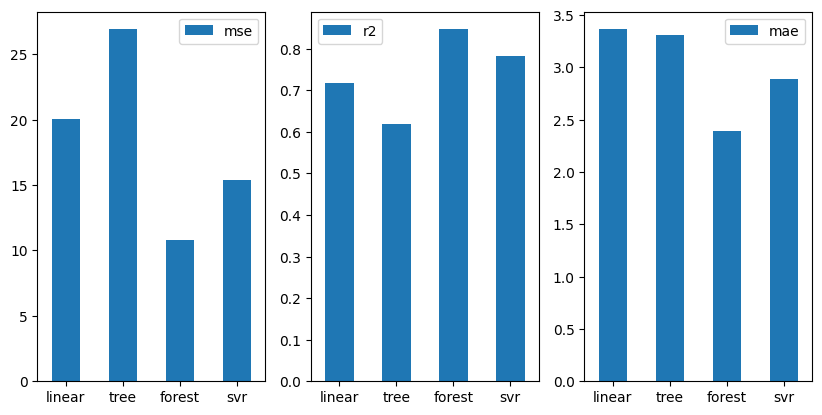

In [111]:
fig, ax = plt.subplots(1, 3)
ax = ax.flat
for i, col in enumerate(metrics_df.columns):
    metrics_df[[col]].plot.bar(ax=ax[i])   
    ax[i].tick_params(axis='x', labelrotation=0)
fig.set_figwidth(10)